# Getting Started with tidyr: Data Cleaning and Transformation

------------------------

Welcome to the tidyr module in our Data Analysis and Visualization series. In this module, we'll explore the `tidyr` package, which is essential for data cleaning and reshaping in R.

## Learning Objectives

After completing this module, you will be able to:

1. [Understand the Importance of Tidy Data](#tidy-data)
   - Explain what tidy data means
   - Recognize untidy data formats

2. [Use Key tidyr Functions](#key-functions)
   - `pivot_longer()` and `pivot_wider()`
   - `separate()` and `unite()`
   - `drop_na()`, `fill()`, and `replace_na()`

3. [Clean and Transform the WHO Dataset](#who-dataset)
   - Handle messy column names
   - Reshape data for analysis

4. [Practical Exercises](#exercises)
5. [Conclusion](#conclusion)

---

<a id='tidy-data'></a>
## 1. Understanding Tidy Data

### What is Tidy Data?

In the context of data analysis, **tidy data** refers to a standard way of mapping the meaning of a dataset to its structure. According to Hadley Wickham's principles:

1. **Each variable forms a column**
2. **Each observation forms a row**
3. **Each type of observational unit forms a table**

Tidy data makes data analysis easier and more efficient because:

- Tools like `ggplot2` and `dplyr` are designed to work with tidy data.
- It reduces the cognitive load of understanding data structure.
- It facilitates data cleaning, manipulation, and visualization.

### Recognizing Untidy Data

Common signs of untidy data include:

- Column headers are values, not variable names.
- Multiple variables are stored in one column.
- Variables are stored in both rows and columns.
- Multiple types of observational units are stored in the same table.
- One observational unit is stored in multiple tables.

---

<a id='key-functions'></a>
## 2. Install Packages and Load Libraries

Let's start by installing and loading the necessary packages.

In [1]:
# Suppress warnings and messages
options(warn=-1)
options(message=FALSE)  # Suppress messages

# Install and load required packages
if (!require(tidyverse)) install.packages("tidyverse")

# Load the tidyverse
library(tidyverse)

Loading required package: tidyverse

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## 3. Key Functions in tidyr

The `tidyr` package provides several functions to help tidy and reshape data. We'll focus on the most commonly used ones:

1. **`pivot_longer()`**: Converts data from wide to long format.
2. **`pivot_wider()`**: Converts data from long to wide format.
3. **`separate()`**: Splits a single column into multiple columns.
4. **`unite()`**: Combines multiple columns into one.
5. **`drop_na()`**: Removes rows containing missing values.
6. **`fill()`**: Fills missing values with the previous or next value.
7. **`replace_na()`**: Replaces missing values with a specified value.

Let's explore each of these functions with examples.

### 3.1 `pivot_longer()`: Wide to Long Format

**Purpose:**

Use `pivot_longer()` when you have multiple columns that represent values of a variable, and you want to gather them into key-value pairs, resulting in fewer columns and more rows.

**Understanding the Arguments:**

- **`cols`**: The columns to pivot (i.e., the columns that contain the values you want to gather into rows).
- **`names_to`**: The name of the new column that will contain the names of the original columns (i.e., the key).
- **`values_to`**: The name of the new column that will contain the values from the original columns.

**Example:** Converting student test scores from wide to long format.

In [2]:
# Sample wide data
scores_wide <- data.frame(
  student = c("Alice", "Bob", "Charlie"),
  math = c(85, 92, 78),
  science = c(90, 88, 85),
  history = c(88, 95, 82)
)

# View the wide data
scores_wide

student,math,science,history
<chr>,<dbl>,<dbl>,<dbl>
Alice,85,90,88
Bob,92,88,95
Charlie,78,85,82


#### Using `pivot_longer()`

We want to reshape the data so that we have one row per student per subject, with a column indicating the subject and another column indicating the score.

**Steps:**

1. **Identify the columns to pivot**:
   - In this case, the columns `math`, `science`, and `history` contain the scores for different subjects. These are the columns we want to gather into rows.
2. **Decide on the names of the new columns**:
   - `names_to = "subject"`: The names of the original columns (`math`, `science`, `history`) will become the values in a new column called `subject`.
   - `values_to = "score"`: The values from the original columns will become the values in a new column called `score`.

In [3]:
# Convert to long format
scores_long <- scores_wide %>%
  pivot_longer(
    cols = math:history,       # Columns to pivot
    names_to = "subject",     # New column to hold the names of the original columns
    values_to = "score"       # New column to hold the values from the original columns
  )

# View the long data
scores_long

student,subject,score
<chr>,<chr>,<dbl>
Alice,math,85
Alice,science,90
Alice,history,88
Bob,math,92
Bob,science,88
Bob,history,95
Charlie,math,78
Charlie,science,85
Charlie,history,82


**Explanation:**

- The `pivot_longer()` function takes the columns `math`, `science`, and `history` and gathers them into two new columns: `subject` and `score`.
- Each student's scores for different subjects are now represented as separate rows.
- The `student` column is repeated for each subject, maintaining the relationship between students and their scores.

### 3.2 `pivot_wider()`: Long to Wide Format

**Purpose:**

Use `pivot_wider()` when you have observations that are scattered across multiple rows and you want to spread them into columns, resulting in more columns and fewer rows.

**Understanding the Arguments:**

- **`names_from`**: The column whose values will become the new column names.
- **`values_from`**: The column whose values will fill the new columns.

**Example:** Converting the long format back to wide format.

In [4]:
# Convert back to wide format
scores_wide_again <- scores_long %>%
  pivot_wider(
    names_from = subject,    # The values in 'subject' become new column names
    values_from = score      # The values in 'score' fill the new columns
  )

# View the wide data
scores_wide_again

student,math,science,history
<chr>,<dbl>,<dbl>,<dbl>
Alice,85,90,88
Bob,92,88,95
Charlie,78,85,82


**Explanation:**

- The `pivot_wider()` function takes the unique values from the `subject` column (`math`, `science`, `history`) and creates new columns with those names.
- The corresponding `score` values are placed into these new columns.
- The result is the original wide format, with one row per student and separate columns for each subject.

### Visual Representation

#### Wide Format:

| student  | math | science | history |
|----------|------|---------|---------|
| Alice    | 85   | 90      | 88      |
| Bob      | 92   | 88      | 95      |
| Charlie  | 78   | 85      | 82      |

#### Long Format (after `pivot_longer()`):

| student  | subject | score |
|----------|---------|-------|
| Alice    | math    | 85    |
| Alice    | science | 90    |
| Alice    | history | 88    |
| Bob      | math    | 92    |
| Bob      | science | 88    |
| Bob      | history | 95    |
| Charlie  | math    | 78    |
| Charlie  | science | 85    |
| Charlie  | history | 82    |

### 3.3 `separate()`: Splitting Columns

**Purpose:**

Use `separate()` to split a single column into multiple columns based on a separator or a specific position.

**Understanding the Arguments:**

- **`col`**: The column to separate.
- **`into`**: The names of the new columns to create.
- **`sep`**: The separator character or a regular expression. If not specified, `separate()` will try to guess.

**Example:** Splitting a column with full names into first and last names.

In [5]:
# Sample data with full names
names_data <- data.frame(
  id = 1:3,
  full_name = c("Alice Smith", "Bob Jones", "Charlie Brown")
)

# View the data
names_data

id,full_name
<int>,<chr>
1,Alice Smith
2,Bob Jones
3,Charlie Brown


#### Using `separate()`

**Steps:**

1. **Identify the column to separate**:
   - The `full_name` column contains both first and last names.
2. **Decide on the names of the new columns**:
   - We want to create two new columns: `first_name` and `last_name`.
3. **Specify the separator**:
   - The names are separated by a space (`" "`), so we'll use that as the separator.

In [6]:
# Separate full_name into first_name and last_name
names_separated <- names_data %>%
  separate(
    col = full_name,                    # Column to separate
    into = c("first_name", "last_name"), # New columns to create
    sep = " "                           # Separator (space character)
  )

# View the separated data
names_separated

id,first_name,last_name
<int>,<chr>,<chr>
1,Alice,Smith
2,Bob,Jones
3,Charlie,Brown


**Explanation:**

- The `separate()` function splits the `full_name` column into two new columns: `first_name` and `last_name`.
- The separation occurs at the space character (`" "`), dividing the string into parts wherever the separator is found.
- The original `full_name` column is replaced by the new columns.

### 3.4 `unite()`: Combining Columns

**Purpose:**

Use `unite()` to combine multiple columns into a single column, often useful when you need to create composite keys or identifiers.

**Understanding the Arguments:**

- **`col`**: The name of the new column to create.
- **`...`**: The columns to unite (can be column names or positions).
- **`sep`**: The separator to use between values (default is "_").

**Example:** Combining first and last names back into full names.

In [7]:
# Unite first_name and last_name into full_name
names_united <- names_separated %>%
  unite(
    col = "full_name",         # Name of the new column
    first_name, last_name,      # Columns to unite
    sep = " "                  # Separator (space character)
  )

# View the united data
names_united

id,full_name
<int>,<chr>
1,Alice Smith
2,Bob Jones
3,Charlie Brown


**Explanation:**

- The `unite()` function combines the `first_name` and `last_name` columns into a new column called `full_name`.
- The values from the specified columns are concatenated with the separator (`" "`) between them.
- The original columns (`first_name` and `last_name`) are removed by default and replaced by the new column.

### 3.5 Handling Missing Data

#### `drop_na()`: Removing Rows with Missing Values

**Purpose:**

Use `drop_na()` to remove rows from a data frame that contain missing values (`NA`).

**Understanding the Arguments:**

- **`cols`** (optional): Specify columns to check for missing values. If omitted, all columns are checked.

In [8]:
# Sample data with missing values
data_with_na <- data.frame(
  id = 1:5,
  value = c(10, NA, 30, NA, 50)
)

# View the data
data_with_na

id,value
<int>,<dbl>
1,10
2,NA
3,30
4,NA
5,50


#### Using `drop_na()`

**Steps:**

- Since we want to remove any rows where the `value` column is `NA`, we'll use `drop_na()` without specifying columns.
- This will check all columns for missing values and remove any rows that contain `NA`.

In [9]:
# Drop rows with missing values
data_no_na <- data_with_na %>%
  drop_na()

# View the data without NAs
data_no_na

id,value
<int>,<dbl>
1,10
3,30
5,50


**Explanation:**

- The `drop_na()` function removes any rows that contain `NA` values in any column.
- In this example, rows with `id` 2 and 4 are removed because they have missing values in the `value` column.
- The resulting data frame contains only the rows with complete data.

#### `fill()`: Filling Missing Values

**Purpose:**

Use `fill()` to fill missing values in a column using the last or next non-missing value, which is useful for propagating previous values forward or backward.

**Understanding the Arguments:**

- **`...`**: The columns to apply the fill to.
- **`.direction`**: Direction to fill (`"down"`, `"up"`, `"downup"`, `"updown"`).

**Example:** Filling missing group labels.

In [10]:
# Sample data with missing values
data_to_fill <- data.frame(
  id = 1:5,
  group = c("A", NA, NA, "B", NA)
)

# View the data
data_to_fill

id,group
<int>,<chr>
1,A
2,NA
3,NA
4,B
5,NA


#### Using `fill()`

**Steps:**

- We want to fill the missing values in the `group` column with the last known value.
- We'll specify the column `group` and set `.direction = "down"` to fill downwards.

In [11]:
# Fill missing values
data_filled <- data_to_fill %>%
  fill(group, .direction = "down")

# View the filled data
data_filled

id,group
<int>,<chr>
1,A
2,A
3,A
4,B
5,B


**Explanation:**

- The `fill()` function takes the last known non-missing value in the `group` column and fills it into subsequent `NA` values.
- For `id` 2 and 3, the missing `group` values are filled with `"A"`.
- For `id` 5, the missing `group` value is filled with `"B"` from `id` 4.

#### `replace_na()`: Replacing Missing Values

**Purpose:**

Use `replace_na()` to replace missing values with a specified value, which can be helpful when you want to impute missing data or set defaults.

**Understanding the Arguments:**

- **`replace`**: A named list of columns and the values to replace `NA` with.

In [12]:
# Replace missing values with zero
data_replaced <- data_with_na %>%
  replace_na(list(value = 0))

# View the data with replaced NAs
data_replaced

id,value
<int>,<dbl>
1,10
2,0
3,30
4,0
5,50


**Explanation:**

- The `replace_na()` function replaces `NA` values in the `value` column with `0`.
- Rows with `id` 2 and 4 now have `value` set to `0` instead of `NA`.
- This can be useful when missing values represent zero or when you need to perform calculations without `NA` values.

<a id='who-dataset'></a>
## 4. Cleaning and Transforming the WHO Dataset

### Dataset Background

We'll work with the World Health Organization (WHO) Tuberculosis (TB) data included in the `tidyr` package. This dataset is messy and requires significant cleaning before analysis.

Let's load the dataset and take a look.

In [13]:
# Load the WHO dataset
who_data <- who

# View the dataset
print(who_data)

# A tibble: 7,240 × 60
   country  iso2  iso3   year new_sp_m014 new_sp_m1524 new_sp_m2534 new_sp_m3544
   <chr>    <chr> <chr> <dbl>       <dbl>        <dbl>        <dbl>        <dbl>
 1 Afghani… AF    AFG    1980          NA           NA           NA           NA
 2 Afghani… AF    AFG    1981          NA           NA           NA           NA
 3 Afghani… AF    AFG    1982          NA           NA           NA           NA
 4 Afghani… AF    AFG    1983          NA           NA           NA           NA
 5 Afghani… AF    AFG    1984          NA           NA           NA           NA
 6 Afghani… AF    AFG    1985          NA           NA           NA           NA
 7 Afghani… AF    AFG    1986          NA           NA           NA           NA
 8 Afghani… AF    AFG    1987          NA           NA           NA           NA
 9 Afghani… AF    AFG    1988          NA           NA           NA           NA
10 Afghani… AF    AFG    1989          NA           NA           NA           NA
# ℹ 7

### Observations

- The dataset has multiple columns that contain values rather than variable names.
- The column names are not descriptive and contain information that should be in separate columns.
- There are missing values (`NA`) scattered throughout the data.

### Goal

Our goal is to clean and reshape the data into a tidy format suitable for analysis.

### 4.1 Reshaping the Data

#### Step 1: Gather the Cases Columns

The columns starting with `new_` represent new TB cases and contain values spread across multiple columns. We'll use `pivot_longer()` to gather these columns into key-value pairs.

**Understanding the Arguments:**

- **`cols = starts_with("new")`**: We select all columns whose names start with `"new"`.
- **`names_to = "key"`**: The names of the original columns will be stored in a new column called `key`.
- **`values_to = "cases"`**: The values from the original columns will be stored in a new column called `cases`.
- **`values_drop_na = TRUE`**: Rows with missing values in `cases` will be automatically removed.

In [14]:
# Gather the new cases columns
who_long <- who_data %>%
  pivot_longer(
    cols = starts_with("new"),   # Columns to pivot
    names_to = "key",            # New column for the original column names
    values_to = "cases",         # New column for the values
    values_drop_na = TRUE         # Remove rows with NA in 'cases'
  )

# View the transformed data
print(who_long)

# A tibble: 76,046 × 6
   country     iso2  iso3   year key          cases
   <chr>       <chr> <chr> <dbl> <chr>        <dbl>
 1 Afghanistan AF    AFG    1997 new_sp_m014      0
 2 Afghanistan AF    AFG    1997 new_sp_m1524    10
 3 Afghanistan AF    AFG    1997 new_sp_m2534     6
 4 Afghanistan AF    AFG    1997 new_sp_m3544     3
 5 Afghanistan AF    AFG    1997 new_sp_m4554     5
 6 Afghanistan AF    AFG    1997 new_sp_m5564     2
 7 Afghanistan AF    AFG    1997 new_sp_m65       0
 8 Afghanistan AF    AFG    1997 new_sp_f014      5
 9 Afghanistan AF    AFG    1997 new_sp_f1524    38
10 Afghanistan AF    AFG    1997 new_sp_f2534    36
# ℹ 76,036 more rows


**Explanation:**

- The `pivot_longer()` function gathers all the columns that start with `"new"` into two new columns: `key` and `cases`.
- Each row now represents a single observation for a country, year, and a specific type of TB case.
- The `key` column contains encoded information about the type of TB cases (e.g., `"new_sp_m014"`), which we'll need to further process.

#### Step 2: Separate the `key` Column

The `key` column contains multiple pieces of information concatenated together. We need to separate this into meaningful variables.

**Example of `key` values:**

- `"new_sp_m014"` can be broken down into:
  - `"new"`: Indicates new cases.
  - `"sp"`: Type of TB case (e.g., sputum positive).
  - `"m014"`: Demographic group (male aged 0-14).

**Using `separate()`:**

- **`col = key`**: We are separating the `key` column.
- **`into = c("new", "type", "sexage")`**: We split the `key` into three new columns.
- **`sep = "_"`**: We use the underscore character as the separator.

In [15]:
# Separate the key column
who_separated <- who_long %>%
  separate(
    col = key,                         # Column to separate
    into = c("new", "type", "sexage"), # New columns to create
    sep = "_"                          # Separator (underscore)
  )

# View the separated data
print(who_separated)

# A tibble: 76,046 × 8
   country     iso2  iso3   year new   type  sexage cases
   <chr>       <chr> <chr> <dbl> <chr> <chr> <chr>  <dbl>
 1 Afghanistan AF    AFG    1997 new   sp    m014       0
 2 Afghanistan AF    AFG    1997 new   sp    m1524     10
 3 Afghanistan AF    AFG    1997 new   sp    m2534      6
 4 Afghanistan AF    AFG    1997 new   sp    m3544      3
 5 Afghanistan AF    AFG    1997 new   sp    m4554      5
 6 Afghanistan AF    AFG    1997 new   sp    m5564      2
 7 Afghanistan AF    AFG    1997 new   sp    m65        0
 8 Afghanistan AF    AFG    1997 new   sp    f014       5
 9 Afghanistan AF    AFG    1997 new   sp    f1524     38
10 Afghanistan AF    AFG    1997 new   sp    f2534     36
# ℹ 76,036 more rows


**Explanation:**

- The `separate()` function splits the `key` column into three new columns: `new`, `type`, and `sexage`.
- The separation occurs at each underscore (`"_"`) character in the `key` values.
- The `new` column is redundant (since all values are "new"), and we can consider dropping it later.

#### Step 3: Extract `sex` and `age` from `sexage`

The `sexage` column combines both the sex and age group information. We'll extract these into separate columns.

**Understanding the Data:**

- The `sexage` values are formatted as `"m014"`, `"f1524"`, etc.
- The first character represents sex (`"m"` for male, `"f"` for female).
- The remaining characters represent the age group (e.g., `"014"` for ages 0-14).

**Using `mutate()` and string functions:**

- **`sex = substr(sexage, 1, 1)`**: Extracts the first character for sex.
- **`age = substr(sexage, 2, nchar(sexage))`**: Extracts the remaining characters for age group.

In [16]:
# Extract sex and age
who_clean <- who_separated %>%
  mutate(
    sex = substr(sexage, 1, 1),                      # Extract first character
    age = substr(sexage, 2, nchar(sexage))           # Extract remaining characters
  ) %>%
  select(-c(new, sexage))                            # Remove redundant columns

# View the cleaned data
print(who_clean)

# A tibble: 76,046 × 8
   country     iso2  iso3   year type  cases sex   age  
   <chr>       <chr> <chr> <dbl> <chr> <dbl> <chr> <chr>
 1 Afghanistan AF    AFG    1997 sp        0 m     014  
 2 Afghanistan AF    AFG    1997 sp       10 m     1524 
 3 Afghanistan AF    AFG    1997 sp        6 m     2534 
 4 Afghanistan AF    AFG    1997 sp        3 m     3544 
 5 Afghanistan AF    AFG    1997 sp        5 m     4554 
 6 Afghanistan AF    AFG    1997 sp        2 m     5564 
 7 Afghanistan AF    AFG    1997 sp        0 m     65   
 8 Afghanistan AF    AFG    1997 sp        5 f     014  
 9 Afghanistan AF    AFG    1997 sp       38 f     1524 
10 Afghanistan AF    AFG    1997 sp       36 f     2534 
# ℹ 76,036 more rows


**Explanation:**

- We use `substr()` to extract parts of the `sexage` string.
- The `sex` column now contains `"m"` or `"f"`.
- The `age` column contains the age group codes (e.g., `"014"`, `"1524"`).
- We remove the `new` and `sexage` columns as they are no longer needed.

#### Step 4: Final Cleaning

- **Rename columns**: Ensure that column names are clear and consistent.
- **Arrange the data**: Order the data for better readability.
- **Remove missing values**: Use `drop_na()` to remove any remaining rows with missing `cases`.

In [17]:
# Final cleaning steps
who_final <- who_clean %>%
  rename(
    country = country,
    iso2 = iso2,
    iso3 = iso3,
    year = year,
    type = type,
    sex = sex,
    age_group = age,
    cases = cases
  ) %>%
  arrange(country, year, sex, age_group) %>%
  drop_na(cases)

# View the final cleaned data
print(who_final)

# A tibble: 76,046 × 8
   country     iso2  iso3   year type  cases sex   age_group
   <chr>       <chr> <chr> <dbl> <chr> <dbl> <chr> <chr>    
 1 Afghanistan AF    AFG    1997 sp        5 f     014      
 2 Afghanistan AF    AFG    1997 sp       38 f     1524     
 3 Afghanistan AF    AFG    1997 sp       36 f     2534     
 4 Afghanistan AF    AFG    1997 sp       14 f     3544     
 5 Afghanistan AF    AFG    1997 sp        8 f     4554     
 6 Afghanistan AF    AFG    1997 sp        0 f     5564     
 7 Afghanistan AF    AFG    1997 sp        1 f     65       
 8 Afghanistan AF    AFG    1997 sp        0 m     014      
 9 Afghanistan AF    AFG    1997 sp       10 m     1524     
10 Afghanistan AF    AFG    1997 sp        6 m     2534     
# ℹ 76,036 more rows


**Explanation:**

- We ensure that all column names are clear and self-explanatory.
- The data is arranged by `country`, `year`, `sex`, and `age_group` for logical ordering.
- We remove any rows where `cases` is `NA` to focus on complete observations.

### 4.2 Analyzing the Cleaned Data

Now that the data is tidy, we can perform analysis and create visualizations.

#### Example: Total Cases by Year

Let's calculate the total number of TB cases reported to WHO each year.

In [18]:
# Total cases by year
cases_by_year <- who_final %>%
  group_by(year) %>%
  summarize(total_cases = sum(cases))

# View the summary
cases_by_year

year,total_cases
<dbl>,<dbl>
1980,959
1981,805
1982,824
1983,786
1984,814
1985,799
1986,754
1987,670
1988,682


#### Plotting Total Cases Over Time

We can visualize the total TB cases over time using a line plot.

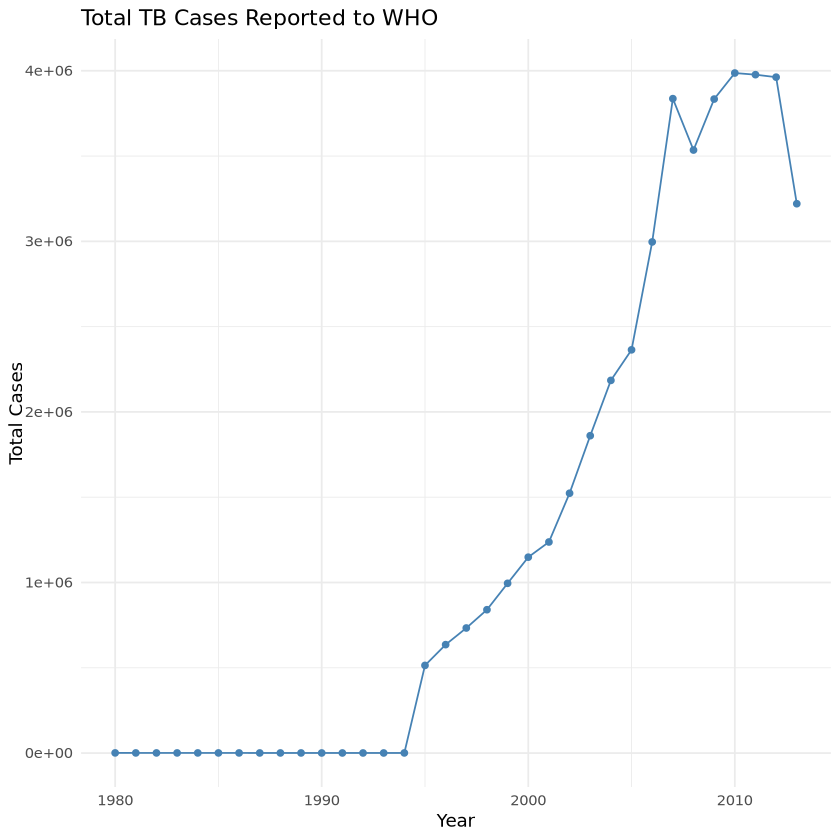

In [19]:
# Plot total cases over time
ggplot(cases_by_year, aes(x = year, y = total_cases)) +
  geom_line(color = "steelblue") +
  geom_point(color = "steelblue") +
  labs(
    title = "Total TB Cases Reported to WHO",
    x = "Year",
    y = "Total Cases"
  ) +
  theme_minimal()

<a id='exercises'></a>
## 5. Practical Exercises

### Exercise 1: Further Analysis of WHO Data

**Task**: Using the cleaned WHO dataset (`who_final`), calculate the total number of cases by sex and create a bar plot to visualize the differences.

#### Your Code Here

In [20]:
# Your code here

<details>
<summary><strong>Hint:</strong> Click to expand</summary>

- Use `group_by(sex)` and `summarize()` to calculate total cases.
- Use `ggplot2` to create the bar plot.
- Remember to label your axes and add a title.

</details>

<details>
<summary><strong>Solution:</strong> Click to expand</summary>

```R
# Solution
cases_by_sex <- who_final %>%
  group_by(sex) %>%
  summarize(total_cases = sum(cases))

# View the summary
cases_by_sex

# Plot total cases by sex
ggplot(cases_by_sex, aes(x = sex, y = total_cases, fill = sex)) +
  geom_bar(stat = "identity") +
  labs(
    title = "Total TB Cases by Sex",
    x = "Sex",
    y = "Total Cases"
  ) +
  theme_minimal() +
  theme(legend.position = "none")
```

</details>

### Exercise 2: Age Group Analysis

**Task**: Determine which age group has the highest number of TB cases. Create a bar plot to illustrate your findings.

#### Your Code Here

In [21]:
# Your code here

<details>
<summary><strong>Hint:</strong> Click to expand</summary>

- Use `group_by(age_group)` and `summarize()` to calculate total cases.
- Arrange the data in descending order to find the highest.
- Use `ggplot2` to create the bar plot.

</details>

<details>
<summary><strong>Solution:</strong> Click to expand</summary>

```R
# Solution
cases_by_age <- who_final %>%
  group_by(age_group) %>%
  summarize(total_cases = sum(cases)) %>%
  arrange(desc(total_cases))

# View the summary
cases_by_age

# Plot total cases by age group
ggplot(cases_by_age, aes(x = age_group, y = total_cases, fill = age_group)) +
  geom_bar(stat = "identity") +
  labs(
    title = "Total TB Cases by Age Group",
    x = "Age Group",
    y = "Total Cases"
  ) +
  theme_minimal() +
  theme(legend.position = "none")
```

</details>

<a id='conclusion'></a>
## 6. Conclusion

In this module, we've learned how to use the `tidyr` package to clean and reshape data into a tidy format. By mastering functions like `pivot_longer()`, `pivot_wider()`, `separate()`, and `unite()`, you can handle messy datasets effectively and prepare them for analysis.

Tidy data is crucial for efficient data analysis and visualization. With clean data, you can leverage the full power of tools like `dplyr` and `ggplot2` to extract insights and communicate your findings.

---

If you have any questions or need further clarification, feel free to reach out!

---

**Next Steps**:

- Practice tidying datasets from various domains.
- Explore advanced `tidyr` functions like `nest()` and `unnest()`.
- Combine `tidyr` with `dplyr` for powerful data manipulation.
- Continue to the next module on advanced data analysis techniques.

---